### Import libraries 

In [146]:
#per creare rete
import pandas as pd
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

In [147]:
G=nx.read_gexf('final_net.gexf', node_type=int)
df_nodes=pd.read_csv('df_final.csv')
df_nodes['user_id']=df_nodes['user_id'].map(int)
df_nodes=df_nodes.set_index('user_id')
df_nodes['location']=df_nodes['location'].fillna('no loc')
df_nodes.head()

,tweet_id,retweet_id,hashtag,location,verified,cat
user_id,,,,,,
290883,1502663077191426051,2956836471,"{'johnsonout47', 'nhsbadbill', 'slavaukraini'}",European Union,False,pax
298073,1503178785746685954,889765401822973952,{'slavaukraini'},no loc,False,proukr
611093,1501988978345627654,56698771,"{'ukraine', 'standwithukraine', 'odesa', 'slav...",istanbul,False,pax
699793,1502982769219371008,154830217,"{'slavaukraini', 'ukrainerussiawar'}",Pale Blue Dot/127.0.0.1,False,pax
756049,1502704662138568705,1255561430,"{'slavaukraini', 'ukraine'}",France,False,proukr


In [148]:
def divide_geo(geo):
    if ',' in geo:
        loc=geo.split(',')
        return loc[len(loc)-1]
    else:
        return geo
df_nodes['location']=df_nodes['location'].map(divide_geo)

In [149]:
df_nodes['location'].value_counts()

no loc                         12549
 USA                             965
 England                         739
 CA                              249
United States                    215
                               ...  
 Ukraine 🌻                         1
 Castilla y León                   1
europe | germany | bavaria         1
nearly a driver                    1
Occupied America                   1
Name: location, Length: 8080, dtype: int64

In [7]:
G.number_of_edges()

11968

In [9]:
G.number_of_nodes()

10184

# Community discovery algorithms

# Label Propagation

In [10]:
label_prop = algorithms.label_propagation(G)
label_prop.method_name

'Label Propagation'

In [12]:
label_prop_com=label_prop.communities
communities=[]

for i, c in enumerate(label_prop_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 393}, {'proukr': 1346}, {'nocare': 123}, {'prorus': 73})},
 {1: ({'pax': 357}, {'proukr': 1010}, {'nocare': 107}, {'prorus': 64})},
 {2: ({'pax': 101}, {'proukr': 380}, {'nocare': 37}, {'prorus': 24})},
 {3: ({'pax': 118}, {'proukr': 354}, {'nocare': 24}, {'prorus': 14})},
 {4: ({'pax': 76}, {'proukr': 242}, {'nocare': 29}, {'prorus': 14})},
 {5: ({'pax': 69}, {'proukr': 210}, {'nocare': 21}, {'prorus': 8})},
 {6: ({'pax': 45}, {'proukr': 157}, {'nocare': 19}, {'prorus': 4})},
 {7: ({'pax': 26}, {'proukr': 90}, {'nocare': 12}, {'prorus': 8})},
 {8: ({'pax': 23}, {'proukr': 96}, {'nocare': 5}, {'prorus': 11})},
 {9: ({'pax': 24}, {'proukr': 77}, {'nocare': 7}, {'prorus': 6})},
 {10: ({'pax': 20}, {'proukr': 78}, {'nocare': 5}, {'prorus': 8})},
 {11: ({'pax': 27}, {'proukr': 75}, {'nocare': 5}, {'prorus': 4})},
 {12: ({'pax': 28}, {'proukr': 60}, {'nocare': 11}, {'prorus': 1})},
 {13: ({'pax': 29}, {'proukr': 54}, {'nocare': 5}, {'prorus': 6})},
 {14: ({'pax': 21}, {'proukr

In [13]:
print(len(label_prop.communities))

360

In [14]:
label_prop.overlap

False

In [15]:
label_prop.node_coverage

1.0

In [16]:
#label_prop.to_json()

# Louvain 

In [17]:
#Leiden algorithm is an improvement of the Louvain algorithm
louvain = algorithms.leiden(G)
louvain.method_name 

'Leiden'

In [18]:
#Clustering parameters
louvain.method_parameters 

{'initial_membership': None, 'weights': None}

In [19]:
louvain_com=louvain.communities
communities=[]

for i, c in enumerate(louvain_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 327}, {'proukr': 1150}, {'nocare': 108}, {'prorus': 56})},
 {1: ({'pax': 253}, {'proukr': 684}, {'nocare': 78}, {'prorus': 46})},
 {2: ({'pax': 148}, {'proukr': 461}, {'nocare': 47}, {'prorus': 28})},
 {3: ({'pax': 102}, {'proukr': 394}, {'nocare': 37}, {'prorus': 27})},
 {4: ({'pax': 118}, {'proukr': 379}, {'nocare': 23}, {'prorus': 14})},
 {5: ({'pax': 101}, {'proukr': 353}, {'nocare': 37}, {'prorus': 18})},
 {6: ({'pax': 64}, {'proukr': 234}, {'nocare': 24}, {'prorus': 9})},
 {7: ({'pax': 72}, {'proukr': 222}, {'nocare': 23}, {'prorus': 12})},
 {8: ({'pax': 54}, {'proukr': 161}, {'nocare': 22}, {'prorus': 16})},
 {9: ({'pax': 48}, {'proukr': 138}, {'nocare': 11}, {'prorus': 11})},
 {10: ({'pax': 52}, {'proukr': 136}, {'nocare': 12}, {'prorus': 7})},
 {11: ({'pax': 42}, {'proukr': 130}, {'nocare': 19}, {'prorus': 7})},
 {12: ({'pax': 49}, {'proukr': 128}, {'nocare': 12}, {'prorus': 8})},
 {13: ({'pax': 53}, {'proukr': 121}, {'nocare': 9}, {'prorus': 13})},
 {14: ({'pax'

In [20]:
len(louvain.communities)

51

In [21]:
#veirfy if the clustering overlap or not
louvain.overlap 

False

In [22]:
#percentage of node covered by the clustering
louvain.node_coverage 

1.0

In [23]:
#json representation of the results
#louvain.to_json()

# Walktrap

In [100]:
k_clique=algorithms.walktrap(G)   #.kclique(G, k=3)

In [101]:
k_clique_com=k_clique.communities
communities=[]

for i, c in enumerate(k_clique_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus#,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 450}, {'proukr': 1592}, {'nocare': 148}, {'prorus': 85})},
 {1: ({'pax': 384}, {'proukr': 1079}, {'nocare': 110}, {'prorus': 64})},
 {2: ({'pax': 119}, {'proukr': 366}, {'nocare': 23}, {'prorus': 14})},
 {3: ({'pax': 93}, {'proukr': 304}, {'nocare': 35}, {'prorus': 14})},
 {4: ({'pax': 57}, {'proukr': 205}, {'nocare': 22}, {'prorus': 7})},
 {5: ({'pax': 62}, {'proukr': 175}, {'nocare': 17}, {'prorus': 8})},
 {6: ({'pax': 31}, {'proukr': 117}, {'nocare': 17}, {'prorus': 9})},
 {7: ({'pax': 29}, {'proukr': 112}, {'nocare': 11}, {'prorus': 12})},
 {8: ({'pax': 36}, {'proukr': 105}, {'nocare': 9}, {'prorus': 9})},
 {9: ({'pax': 24}, {'proukr': 101}, {'nocare': 5}, {'prorus': 11})},
 {10: ({'pax': 34}, {'proukr': 87}, {'nocare': 7}, {'prorus': 5})},
 {11: ({'pax': 31}, {'proukr': 76}, {'nocare': 6}, {'prorus': 7})},
 {12: ({'pax': 28}, {'proukr': 80}, {'nocare': 6}, {'prorus': 4})},
 {13: ({'pax': 25}, {'proukr': 74}, {'nocare': 10}, {'prorus': 9})},
 {14: ({'pax': 30}, {'prou

In [102]:
len(k_clique.communities)

222

In [103]:
k_clique.overlap

False

In [104]:
k_clique.node_coverage

1.0

In [76]:
#k_clique.to_json()

# k-Clique

In [127]:
angel= algorithms.kclique(G, k=3) #.angel(G, min_community_size=3, threshold=0.25) #demon(G, min_com_size=3, epsilon =0.3)

In [128]:
angel.method_parameters

{'k': 3}

In [129]:
angel_com=angel.communities
communities=[]

for i, c in enumerate(angel_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 66}, {'proukr': 183}, {'nocare': 16}, {'prorus': 11})},
 {1: ({'pax': 25}, {'proukr': 86}, {'nocare': 7}, {'prorus': 7})},
 {2: ({'pax': 14}, {'proukr': 26}, {'nocare': 2}, {'prorus': 3})},
 {3: ({'pax': 7}, {'proukr': 24}, {'nocare': 4}, {'prorus': 1})},
 {4: ({'pax': 4}, {'proukr': 9}, {'nocare': 2}, {'prorus': 0})},
 {5: ({'pax': 4}, {'proukr': 7}, {'nocare': 1}, {'prorus': 1})},
 {6: ({'pax': 1}, {'proukr': 6}, {'nocare': 1}, {'prorus': 0})},
 {7: ({'pax': 2}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {8: ({'pax': 2}, {'proukr': 2}, {'nocare': 1}, {'prorus': 0})},
 {9: ({'pax': 1}, {'proukr': 4}, {'nocare': 0}, {'prorus': 0})},
 {10: ({'pax': 0}, {'proukr': 3}, {'nocare': 1}, {'prorus': 1})},
 {11: ({'pax': 1}, {'proukr': 1}, {'nocare': 0}, {'prorus': 2})},
 {12: ({'pax': 3}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {13: ({'pax': 1}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {14: ({'pax': 2}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {15: ({'p

In [130]:
angel.overlap

True

In [131]:
angel.node_coverage

0.058228593872741555

In [94]:
#angel.to_json()

# Community Visualization

In [36]:
#pos = nx.spring_layout(G)

In [37]:
#viz.plot_network_clusters(G, louvain, pos, figsize=(10, 10), plot_labels=False)
#viz.plot_network_clusters(G,louvain, pos) visualizzazione alternativa

In [38]:
#viz.plot_network_clusters(G, label_prop, pos, figsize=(10, 10), plot_labels=False)

In [39]:
#viz.plot_network_clusters(G, angel, pos, figsize=(10, 10), plot_labels=False)

In [40]:
#viz.plot_network_clusters(G, girvan_newman, pos, figsize=(10, 10), plot_labels=False)

In [41]:
#viz.plot_community_graph(G, louvain, figsize=(5, 5))

In [42]:
#viz.plot_community_graph(G, label_prop, figsize=(5, 5))

In [43]:
#viz.plot_community_graph(G, angel, figsize=(5, 5))

In [44]:
#viz.plot_community_graph(G, k_clique, figsize=(5, 5))

# Community Internal Evaluation

In [45]:
method=[louvain,label_prop,k_clique,angel]
name_algo=['louvain','label_prop','k_clique','angel']
n_com=[]
size=[]
AND=[]
IED=[]
mod=[]
cond=[]
type_results=['MIN','MAX','SCORE', 'STD']
for algo in method:
    n_com.append(len(algo.communities))
    size.append(algo.size())
    AND.append(algo.average_internal_degree())
    IED.append(algo.internal_edge_density())
    mod.append(algo.modularity_density())
    cond.append(algo.conductance())
for i in range(len(type_results)):
    internal_evaluation=pd.DataFrame({'':name_algo,
                                     'Number of communities':n_com,
                                      'Size': size[i],
                                     'Average Node Degree': AND[i],
                                      'Internal Edge Density':IED[i],
                                      'Modularity':mod[i],
                                      'Conductance':cond[i]})
    internal_evaluation=internal_evaluation.fillna('0')
    internal_evaluation=internal_evaluation.set_index('')
    print('internal_evaluation', type_results[i])
    display(internal_evaluation)

internal_evaluation MIN

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,51,4.000000,1.500000,0.001220,0,0.004367
label_prop,360,1641.000000,3.169591,0.500000,0,0.183007
k_clique,13,199.686275,2.004696,0.072847,92.506276,0.085020
angel,23,281.294591,0.250130,0.131658,0,0.049932


internal_evaluation MAX

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,51,2.000000,1.000000,0.001038,0,0.016949
label_prop,360,1935.000000,2.685306,1.000000,0,0.777778
k_clique,13,28.288889,1.542433,0.464147,356.115741,0.252718
angel,23,138.167631,0.364454,0.353918,0,0.154631


internal_evaluation SCORE

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,51,4.000000,1.500000,0.000506,0,0.004184
label_prop,360,3729.000000,2.715139,0.500000,0,0.961039
k_clique,13,783.384615,2.116539,0.060253,-10.978323,0.124254
angel,23,1151.659574,0.299963,0.129186,0,0.244284


internal_evaluation STD

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,51,4.000000,2.500000,0.028325,0,0.473684
label_prop,360,232.000000,7.836364,0.833333,0,0.993131
k_clique,13,51.782609,4.492944,0.351633,-1345.076099,0.796749
angel,23,61.492281,1.914473,0.292471,0,0.138139


### Community fitness/comparison visualization

<Figure size 2160x2160 with 0 Axes>

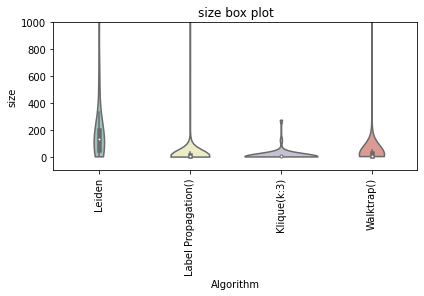

<Figure size 2160x2160 with 0 Axes>

In [132]:
viz.plot_com_stat([louvain, label_prop, angel, k_clique], evaluation.size)
plt.title('size box plot')
plt.ylim([-100,1000])
plt.figure(figsize=(30,30))


<AxesSubplot:xlabel='Algorithm', ylabel='average_internal_degree'>

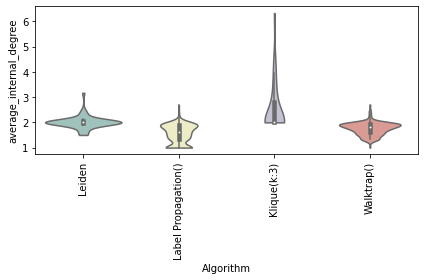

In [133]:
viz.plot_com_stat([louvain, label_prop, angel, k_clique], evaluation.average_internal_degree)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

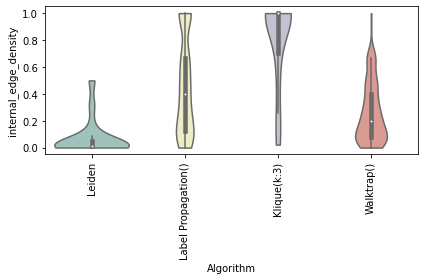

In [134]:
viz.plot_com_stat([louvain, label_prop, angel, k_clique], evaluation.internal_edge_density)

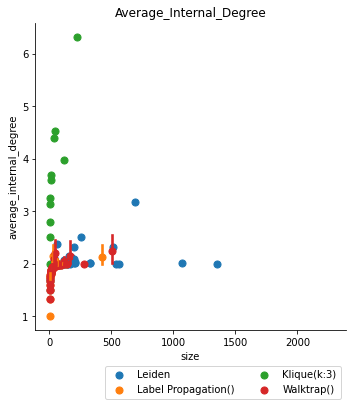

In [135]:
ax=viz.plot_com_properties_relation([louvain, label_prop, angel, k_clique], evaluation.size, evaluation.average_internal_degree) 
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

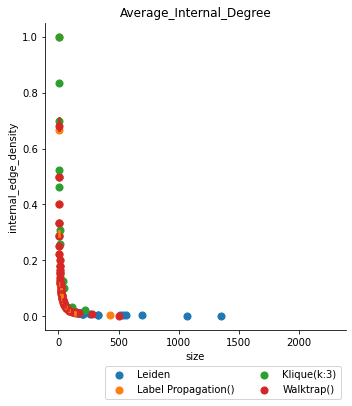

In [136]:
viz.plot_com_properties_relation([louvain, label_prop, angel, k_clique], evaluation.size, evaluation.internal_edge_density)
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

# Partition Comparison

### NMI

In [137]:
evaluation.normalized_mutual_information(louvain, label_prop)

MatchingResult(score=0.7963859306893196, std=None)

In [138]:
evaluation.normalized_mutual_information(louvain, k_clique)

MatchingResult(score=0.8176532707290644, std=None)

In [139]:
evaluation.normalized_mutual_information(label_prop, k_clique)

MatchingResult(score=0.8682980545696777, std=None)

### NF1

In [140]:
evaluation.nf1(label_prop,louvain)

MatchingResult(score=0.024547685185185186, std=None)

In [141]:
evaluation.nf1(label_prop,angel)

MatchingResult(score=0.0115208467359005, std=None)

In [142]:
evaluation.nf1(label_prop,k_clique)

MatchingResult(score=0.33371710147647643, std=None)

In [143]:
evaluation.nf1(louvain,angel)

MatchingResult(score=0.025487402938383325, std=None)

In [144]:
evaluation.nf1(louvain,k_clique)

MatchingResult(score=0.14779513077090933, std=None)

In [145]:
evaluation.nf1(k_clique,angel)

MatchingResult(score=0.009673161533626651, std=None)

# Ground Truth (External) evaluation

In [119]:
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

<AxesSubplot:xlabel='graph', ylabel='score'>

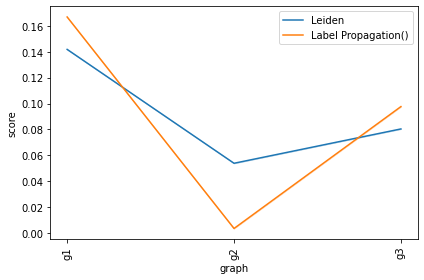

In [121]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<AxesSubplot:xlabel='graph', ylabel='score'>

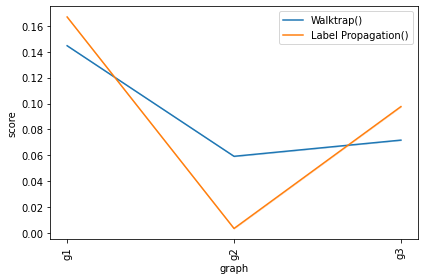

In [122]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.walktrap, algorithms.label_propagation]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<AxesSubplot:xlabel='graph', ylabel='score'>

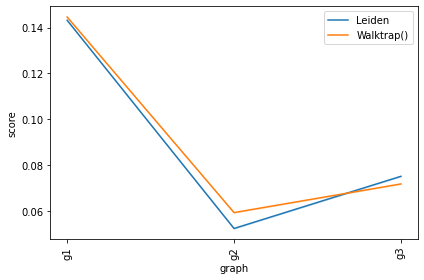

In [123]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.walktrap]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

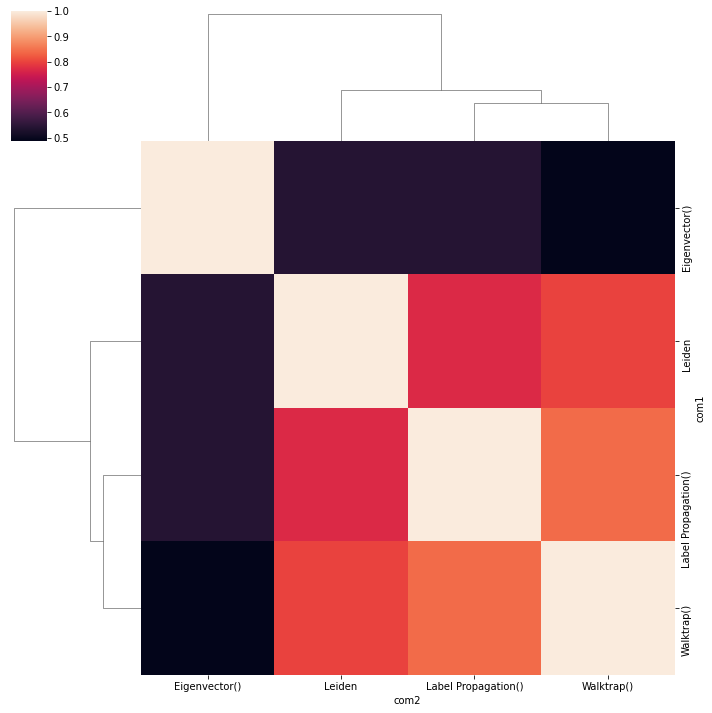

In [126]:
lp_coms = algorithms.label_propagation(G)
leiden_coms = algorithms.leiden(G)
wp_coms = algorithms.walktrap(G)
#girvan_newman = algorithms.girvan_newman(G,level=3)
eig=algorithms.eigenvector(G)

viz.plot_sim_matrix([leiden_coms, lp_coms, wp_coms,eig],evaluation.adjusted_mutual_information)